# Match Prediction for League of Legend

## Overview
League of Legends is one of the most popular games ever existed, and has one of the most important competitive games. In this game, each team (blue and red) fight to take out the enemy's nexus to win the game. Like all strategy games, we have different objectives in the game which give a certain advantage in the game. This information about these objectives is what will help us make our winning prediction model. To increase our chances to win a game, there are lots of different objectives and events to do, fights to win to increase the power of your champion, as well as winning map terrain by taking down turrets and putting vision on the map.

## Goal

Create a model to predict the outcome of a League of Legends match based upon player performance in prior games. Due to the tremendous amount of data available, I anticipate that a model trained on a sufficiently large dataset can achieve a high accuracy at this prediction task.

## Process

## Objectives for this project includes

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Import for Hypothesis Testing
import scipy.stats as stats

#Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Import our python functions
import wrangle as w

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')
plt.rc('font', size=16)

### Wrangle

hasWon will be our predict if a match is win or not

In [5]:
#Drop columns and split into train, validate and test
df, train, validate, test = w.wrangle_data('hasWon','lol_ranked_games.csv')

In [7]:
#split into X sets and y sets
X_train, y_train, X_validate, y_validate, X_test, y_test = w.split_X_y(train, validate, test, 'hasWon')

Prepare Takeaways:

- Our data is now clean and ready to use
- hasWon is our target variable to predict matches 
- Split into train, validate, and test sets 


### Explore

Text(0.5, 1.0, 'Features Correlated with Catch Rates')

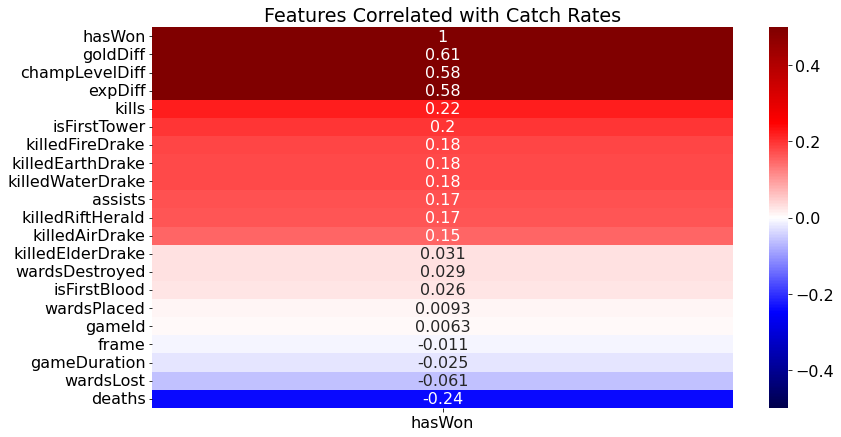

In [8]:
'''returns a beautiful heatmap with correlations according to simplified catch_rates'''
poke_heatmap = sns.heatmap(df.corr()[['hasWon']].sort_values(by='hasWon', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='seismic')
poke_heatmap.set_title('Features Correlated with Catch Rates')